In [1]:
# Imports
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from module.importer import Importer
from module.historic import Historic


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# II. Import des données
files_to_load = glob.glob('../data/match_*.json')
# files_to_load = glob.glob('../data/match_*.json')[:10]

importer = Importer()
df_teams, df_players, df_matchs, df_higlihts, df_substitutions, df_match_players = importer.initialize(files_to_load)

In [4]:
df_teams

,idteam,name
0,14,Liverpool
1,45,Norwich
2,91,Bournemouth
3,49,Sheffield
4,90,Burnley
...,...,...
106,1737,Cadix
107,2894,Huesca
108,2000,Benevento
109,744,Crotone


In [5]:
df_players

,idplayer,lastname
0,15157,Milner
1,41733,Wijnaldum
2,56979,Henderson
3,60706,Adrián
4,60914,Matip
...,...,...
4311,539199,Kallon
4312,518924,Bertini
4313,539223,Bertola
4314,539226,Pietra


In [6]:
df_matchs

,idmatch,date,idteam_home,idteam_away,duration,period,championship,home_formation,away_formation,quotation_home,quotation_away,quotation_draw,home_score,away_score
0,match_1059702,2019-08-09T19:00:00Z,14,45,93,FullTime,2.0,433,4231,1.12,18.00,9.00,4,1
1,match_1059703,2019-08-10T14:00:00Z,91,49,95,FullTime,2.0,3421,352,1.95,3.90,3.55,1,1
2,match_1059704,2019-08-10T14:00:00Z,90,20,94,FullTime,2.0,442,3421,2.65,2.75,3.15,3,0
3,match_1059705,2019-08-10T14:00:00Z,31,11,95,FullTime,2.0,442,4231,3.20,2.35,3.20,0,0
4,match_1059706,2019-08-11T13:00:00Z,13,39,95,FullTime,2.0,4141,352,2.15,3.50,3.25,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589,match_2137737,2021-05-23T18:45:00Z,456,120,95,FullTime,5.0,3421,4231,2.35,2.60,3.98,0,2
3590,match_2137738,2021-05-22T18:45:00Z,603,131,90,FullTime,5.0,532,352,1.55,3.70,3.80,3,0
3591,match_2137739,2021-05-23T18:45:00Z,2036,121,95,FullTime,5.0,433,4231,4.65,1.58,4.65,2,2
3592,match_2137740,2021-05-23T13:00:00Z,127,136,90,FullTime,5.0,352,3511,1.38,5.00,3.90,5,1


In [7]:
df_higlihts

,idmatch,time,idplayer,event,type
0,match_1059702,42,152760,goal,goal
1,match_1059702,28,97032,goal,goal
2,match_1059702,19,118748,goal,goal
3,match_1059702,7,83428,goal,own
4,match_1059702,64,57127,goal,goal
...,...,...,...,...,...
25150,match_2137741,20,179361,booking,yellow
25151,match_2137741,56,161919,booking,yellow
25152,match_2137741,54,487053,booking,yellow
25153,match_2137741,38,141925,booking,yellow


In [8]:
df_substitutions

,idmatch,time,off_playerId,on_playerId,reason
0,match_1059702,39,116535,60706,Injury
1,match_1059702,74,152760,110979,Tactical
2,match_1059702,86,92217,15157,Tactical
3,match_1059702,58,71738,87396,Tactical
4,match_1059702,70,90440,89470,Tactical
...,...,...,...,...,...
25320,match_2137741,41,141925,487053,Injury
25321,match_2137741,63,459089,94239,Tactical
25322,match_2137741,63,50401,192905,Tactical
25323,match_2137741,76,90557,483988,Tactical


In [9]:
df_match_players

,playerid,matchid,teamid,position,formation_place,play_duration,final_mark_2015,quotation_player,touches,total_offside,...,bad_keeper_sweeper_point,six_second_violation_point,cross_not_claimed_point,penalty_save_point,assist_pass_lost,assist_handball_won,assist_free_kick_won,assist_penalty_won,pen_goals_conceded,pen_goals_conceded_point
0,15157,match_1059702,14,Midfielder,0,4,5.0,3.75,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,41733,match_1059702,14,Midfielder,8,90,5.5,4.40,49.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,56979,match_1059702,14,Midfielder,7,90,6.0,5.75,73.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,60706,match_1059702,14,Goalkeeper,0,51,4.5,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,60914,match_1059702,14,Defender,0,0,NaN,9.50,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142495,433734,match_2137741,126,Defender,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142496,459089,match_2137741,126,Goalkeeper,1,63,4.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
142497,470501,match_2137741,126,Forward,0,0,NaN,4.65,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142498,483988,match_2137741,126,Defender,0,14,5.0,18.00,5.0,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN


In [10]:
# III. Historique des transferts
historic = Historic()

df_players_historical = historic.compute(df_matchs, df_match_players, df_players, df_teams)

df_players_historical


,player_id,name,team,starting_date,end_date
0,12269,Cavalli,Ajaccio,2019-07-26T18:00:00Z,None
1,108177,Sane,Sochaux,2019-07-26T18:00:00Z,None
2,57734,Paye,Sochaux,2019-07-26T18:00:00Z,None
3,42714,Sorbon,Guingamp,2019-07-26T18:00:00Z,None
4,45084,Deaux,Guingamp,2019-07-26T18:00:00Z,2019-08-25T13:00:00Z
...,...,...,...,...,...
4971,477723,Delaye,Montpellier,2021-05-23T19:00:00Z,None
4972,477849,Lhéry,Saint-Étienne,2021-05-23T19:00:00Z,None
4973,539225,Saban,Saint-Étienne,2021-05-23T19:00:00Z,None
4974,538781,Belhadji,Dijon,2021-05-23T19:00:00Z,None


In [11]:
# IV. Requêtes - Clubs

## Afficher la liste de tous les clubs (idtean et nom du club)

df_teams

,idteam,name
0,14,Liverpool
1,45,Norwich
2,91,Bournemouth
3,49,Sheffield
4,90,Burnley
...,...,...
106,1737,Cadix
107,2894,Huesca
108,2000,Benevento
109,744,Crotone


In [12]:
## Quel est le nom du club dont l'id est 43 ?

df_teams[df_teams['idteam'] == '43']

,idteam,name
15,43,Man. City


In [13]:
## Quel est le nombre total de clubs ?

df_teams['idteam'].nunique()

111

In [14]:
# IV. Requêtes - Joueurs

# Afficher la liste des joueurs

df_players

,idplayer,lastname
0,15157,Milner
1,41733,Wijnaldum
2,56979,Henderson
3,60706,Adrián
4,60914,Matip
...,...,...
4311,539199,Kallon
4312,518924,Bertini
4313,539223,Bertola
4314,539226,Pietra


In [15]:
## Quel est le nombre total de joueurs ?

df_players['idplayer'].nunique()

4316

In [16]:
# IV. Requêtes - Matchs

## Afficher la liste des matchs joués

df_matchs

,idmatch,date,idteam_home,idteam_away,duration,period,championship,home_formation,away_formation,quotation_home,quotation_away,quotation_draw,home_score,away_score
0,match_1059702,2019-08-09T19:00:00Z,14,45,93,FullTime,2.0,433,4231,1.12,18.00,9.00,4,1
1,match_1059703,2019-08-10T14:00:00Z,91,49,95,FullTime,2.0,3421,352,1.95,3.90,3.55,1,1
2,match_1059704,2019-08-10T14:00:00Z,90,20,94,FullTime,2.0,442,3421,2.65,2.75,3.15,3,0
3,match_1059705,2019-08-10T14:00:00Z,31,11,95,FullTime,2.0,442,4231,3.20,2.35,3.20,0,0
4,match_1059706,2019-08-11T13:00:00Z,13,39,95,FullTime,2.0,4141,352,2.15,3.50,3.25,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589,match_2137737,2021-05-23T18:45:00Z,456,120,95,FullTime,5.0,3421,4231,2.35,2.60,3.98,0,2
3590,match_2137738,2021-05-22T18:45:00Z,603,131,90,FullTime,5.0,532,352,1.55,3.70,3.80,3,0
3591,match_2137739,2021-05-23T18:45:00Z,2036,121,95,FullTime,5.0,433,4231,4.65,1.58,4.65,2,2
3592,match_2137740,2021-05-23T13:00:00Z,127,136,90,FullTime,5.0,352,3511,1.38,5.00,3.90,5,1


In [17]:
## Afficher tous les id des matchs où le club à domicile est Arsenal

# get Arsenal id

arsenal_id = df_teams[df_teams['name'] == 'Arsenal']['idteam'].values[0]

df_matchs[df_matchs['idteam_home'] == arsenal_id]

,idmatch,date,idteam_home,idteam_away,duration,period,championship,home_formation,away_formation,quotation_home,quotation_away,quotation_draw,home_score,away_score
10,match_1059712,2019-08-17T11:30:00Z,3,90,96,FullTime,2.0,4231,442,1.31,9.50,5.50,2,1
30,match_1059732,2019-09-01T15:30:00Z,3,6,96,FullTime,2.0,433,4231,2.50,2.75,3.65,2,2
50,match_1059752,2019-09-22T15:30:00Z,3,7,96,FullTime,2.0,4231,433,1.40,7.75,5.00,3,2
70,match_1059772,2019-10-06T13:00:00Z,3,91,96,FullTime,2.0,4231,442,1.43,7.00,5.05,1,0
90,match_1059792,2019-10-27T16:30:00Z,3,31,98,FullTime,2.0,442,451,1.46,6.25,4.60,2,2
101,match_1059803,2019-11-02T15:00:00Z,3,39,95,FullTime,2.0,4312,343,1.70,4.80,3.80,1,1
121,match_1059823,2019-11-23T15:00:00Z,3,20,98,FullTime,2.0,3412,442,1.47,6.75,4.75,2,2
140,match_1059842,2019-12-05T20:15:00Z,3,36,95,FullTime,2.0,4231,41212,1.54,5.30,4.30,1,2
160,match_1059862,2019-12-15T16:30:00Z,3,43,94,FullTime,2.0,4231,4231,6.50,1.34,5.55,0,3
190,match_1059892,2019-12-29T14:00:00Z,3,8,98,FullTime,2.0,4231,3421,2.72,2.25,3.45,1,2


In [18]:
# Afficher les informations du/des match(s) qui se sont déroulés le 11-08-2019

df_matchs[df_matchs['date'].str.contains('2019-08-11')]

,idmatch,date,idteam_home,idteam_away,duration,period,championship,home_formation,away_formation,quotation_home,quotation_away,quotation_draw,home_score,away_score
4,match_1059706,2019-08-11T13:00:00Z,13,39,95,FullTime,2.0,4141,352,2.15,3.5,3.25,0,0
8,match_1059710,2019-08-11T15:30:00Z,1,8,95,FullTime,2.0,4231,4231,2.20,3.6,3.30,4,0
9,match_1059711,2019-08-11T13:00:00Z,4,3,95,FullTime,2.0,352,4231,4.10,1.9,3.70,0,1
383,match_1060532,2019-08-11T15:00:00Z,153,145,96,FullTime,1.0,3511,433,2.10,4.0,3.25,1,1
386,match_1060535,2019-08-11T13:00:00Z,429,430,95,FullTime,1.0,4231,433,2.00,4.4,3.25,2,1
387,match_1060536,2019-08-11T19:00:00Z,149,2336,93,FullTime,1.0,433,433,1.09,32.0,12.50,3,0


In [19]:
# Combien de match on eut lieu en 2019 ?

df_matchs[df_matchs['date'].str.contains('2019')].shape[0]

925

In [20]:
# Combien de matchs a joué le club Liverpool ?

liverpool_id = df_teams[df_teams['name'] == 'Liverpool']['idteam'].values[0]

df_matchs[(df_matchs['idteam_home'] == liverpool_id) | (df_matchs['idteam_away'] == liverpool_id)].shape[0]

76

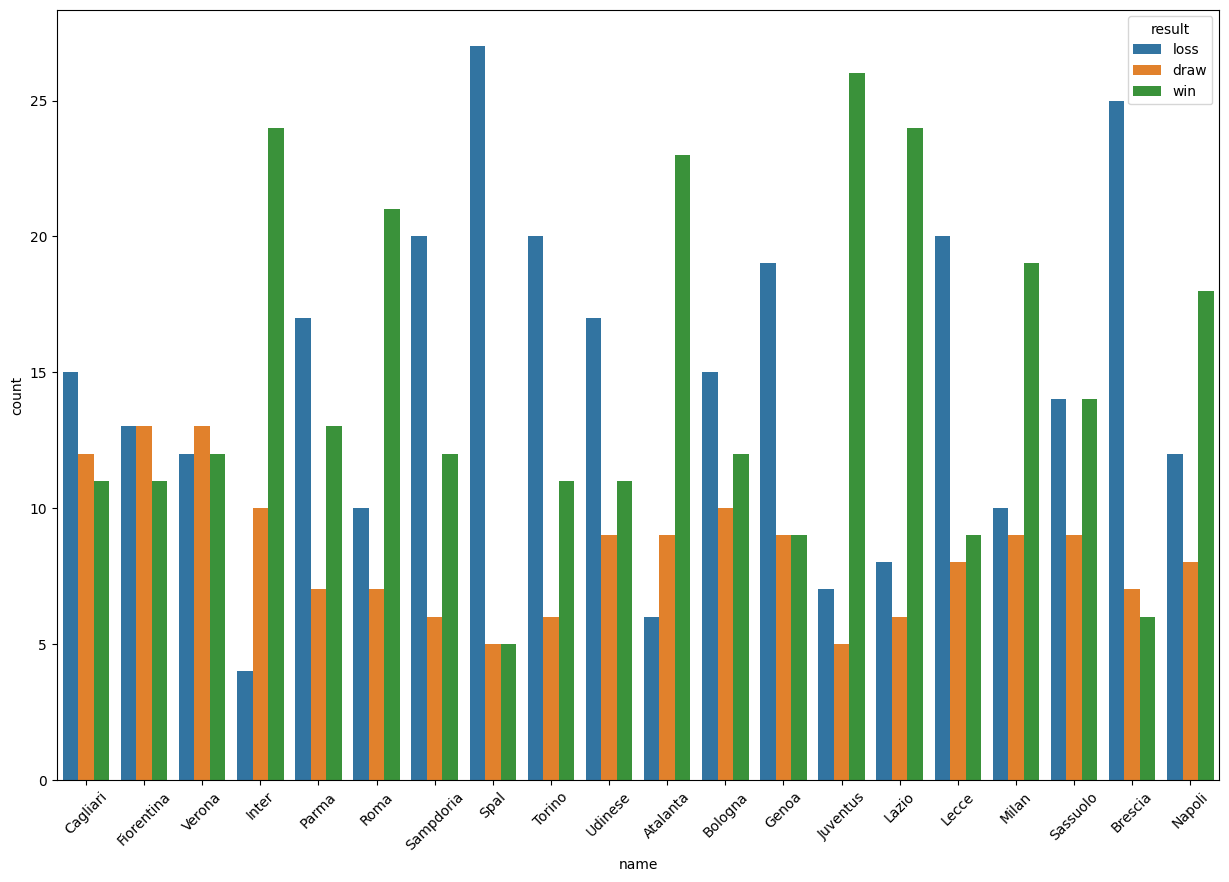

In [21]:
# V. Analyse et visualisation graphique - Résultats en fonction du club

## Afficher le nombre de matchs par club pour le championnat 5 pour la saison
## 2019-2020 (dont victoire, défaite, math nul) (visualisation) Les dates du
## championnat 5 (Série A) pour la saison 2019-2020 sont 24 août 2019 - 2 août
## 2020

df_matchs['date'] = pd.to_datetime(df_matchs['date'])

df_matchs_filtered = df_matchs[(df_matchs['date'] >= '2019-08-24') & (df_matchs['date'] <= '2020-08-02') & (df_matchs['championship'] == 5)]

df_matchs_filtered = df_matchs_filtered[['idteam_home', 'idteam_away', 'home_score', 'away_score', 'championship', 'date']]
df_matchs_filtered = df_matchs_filtered.merge(df_teams, left_on='idteam_home', right_on='idteam', how='left').rename(columns={'name': 'name_home'}).drop(columns='idteam').drop(columns='idteam_home')
df_matchs_filtered = df_matchs_filtered.merge(df_teams, left_on='idteam_away', right_on='idteam', how='left').rename(columns={'name': 'name_away'}).drop(columns='idteam').drop(columns='idteam_away')

df_matchs_filtered['result_home'] = df_matchs_filtered.apply(lambda x: 'win' if x['home_score'] > x['away_score'] else 'draw' if x['home_score'] == x['away_score'] else 'loss', axis=1)
df_matchs_filtered['result_away'] = df_matchs_filtered.apply(lambda x: 'win' if x['home_score'] < x['away_score'] else 'draw' if x['home_score'] == x['away_score'] else 'loss', axis=1)

df_matchs_home = df_matchs_filtered[['name_home', 'result_home']].rename(columns={'name_home': 'name', 'result_home': 'result'})
df_matchs_away = df_matchs_filtered[['name_away', 'result_away']].rename(columns={'name_away': 'name', 'result_away': 'result'})
df_matchs_merged = pd.concat([df_matchs_home, df_matchs_away])

plt.figure(figsize=(15, 10))
sns.countplot(data=df_matchs_merged, x='name', hue='result')
plt.xticks(rotation=45)
plt.show()



In [22]:
# Afficher les 10 meilleures équipes pour le championnat 2 de la saison 2020-
# 2021 (celles avec le meilleur ratio victoire/matchs joués) Les dates du
# championnat 2 (Premier League) pour la saison 2020-2021 sont du 12
# septembre 2020 au 23 mai 2021

df_matchs_filtered = df_matchs[(df_matchs['date'] >= '2020-09-12') & (df_matchs['date'] <= '2021-05-23') & (df_matchs['championship'] == 2)]

df_matchs_filtered = df_matchs_filtered[['idteam_home', 'idteam_away', 'home_score', 'away_score', 'championship', 'date']]

df_matchs_filtered = df_matchs_filtered.merge(df_teams, left_on='idteam_home', right_on='idteam', how='left').rename(columns={'name': 'name_home'}).drop(columns='idteam').drop(columns='idteam_home')
df_matchs_filtered = df_matchs_filtered.merge(df_teams, left_on='idteam_away', right_on='idteam', how='left').rename(columns={'name': 'name_away'}).drop(columns='idteam').drop(columns='idteam_away')

df_matchs_filtered['result_home'] = df_matchs_filtered.apply(lambda x: 'win' if x['home_score'] > x['away_score'] else 'draw' if x['home_score'] == x['away_score'] else 'loss', axis=1)
df_matchs_filtered['result_away'] = df_matchs_filtered.apply(lambda x: 'win' if x['home_score'] < x['away_score'] else 'draw' if x['home_score'] == x['away_score'] else 'loss', axis=1)

df_matchs_home = df_matchs_filtered[['name_home', 'result_home']].rename(columns={'name_home': 'name', 'result_home': 'result'})
df_matchs_away = df_matchs_filtered[['name_away', 'result_away']].rename(columns={'name_away': 'name', 'result_away': 'result'})

df_matchs_merged = pd.concat([df_matchs_home, df_matchs_away])

df_matchs_merged = df_matchs_merged.groupby('name').agg({'result': 'value_counts'}).unstack().fillna(0)

df_matchs_merged['ratio'] = df_matchs_merged['result']['win'] / (df_matchs_merged['result']['win'] + df_matchs_merged['result']['loss'] + df_matchs_merged['result']['draw'])
df_matchs_merged['played'] = df_matchs_merged['result']['win'] + df_matchs_merged['result']['loss'] + df_matchs_merged['result']['draw']

df_matchs_merged = df_matchs_merged.sort_values(by='ratio', ascending=False).head(10)

df_matchs_merged

result              ratio played
result        draw loss win                 
name                                        
Man. City        5    6  25  0.694444     36
Man. United     11    6  20  0.540541     37
Leicester        6   11  20  0.540541     37
Liverpool        9    9  19  0.513514     37
Chelsea         10    8  19  0.513514     37
West Ham         8   11  18  0.486486     37
Leeds            5   15  17  0.459459     37
Arsenal          7   13  17  0.459459     37
Everton          8   12  17  0.459459     37
Tottenham        8   12  16  0.444444     36

In [23]:
# V. Analyse et visualisation graphique - Analyse des performances du joueur Messi

## Quel est l'id de ce joueur ?

messi_id = df_players[df_players['lastname'] == 'Messi']['idplayer'].values[0]

messi_id

'19054'

In [24]:
## A quel(s) club(s) appartient ce joueur ?

df_teams[df_teams['idteam'].isin(df_match_players[df_match_players['playerid'] == messi_id]['teamid'].unique())]

,idteam,name
63,178,Barcelona


(array([18140., 18201., 18262., 18322., 18383., 18444., 18506., 18567.,
        18628., 18687., 18748.]),
 [Text(18140.0, 0, '2019-09'),
  Text(18201.0, 0, '2019-11'),
  Text(18262.0, 0, '2020-01'),
  Text(18322.0, 0, '2020-03'),
  Text(18383.0, 0, '2020-05'),
  Text(18444.0, 0, '2020-07'),
  Text(18506.0, 0, '2020-09'),
  Text(18567.0, 0, '2020-11'),
  Text(18628.0, 0, '2021-01'),
  Text(18687.0, 0, '2021-03'),
  Text(18748.0, 0, '2021-05')])

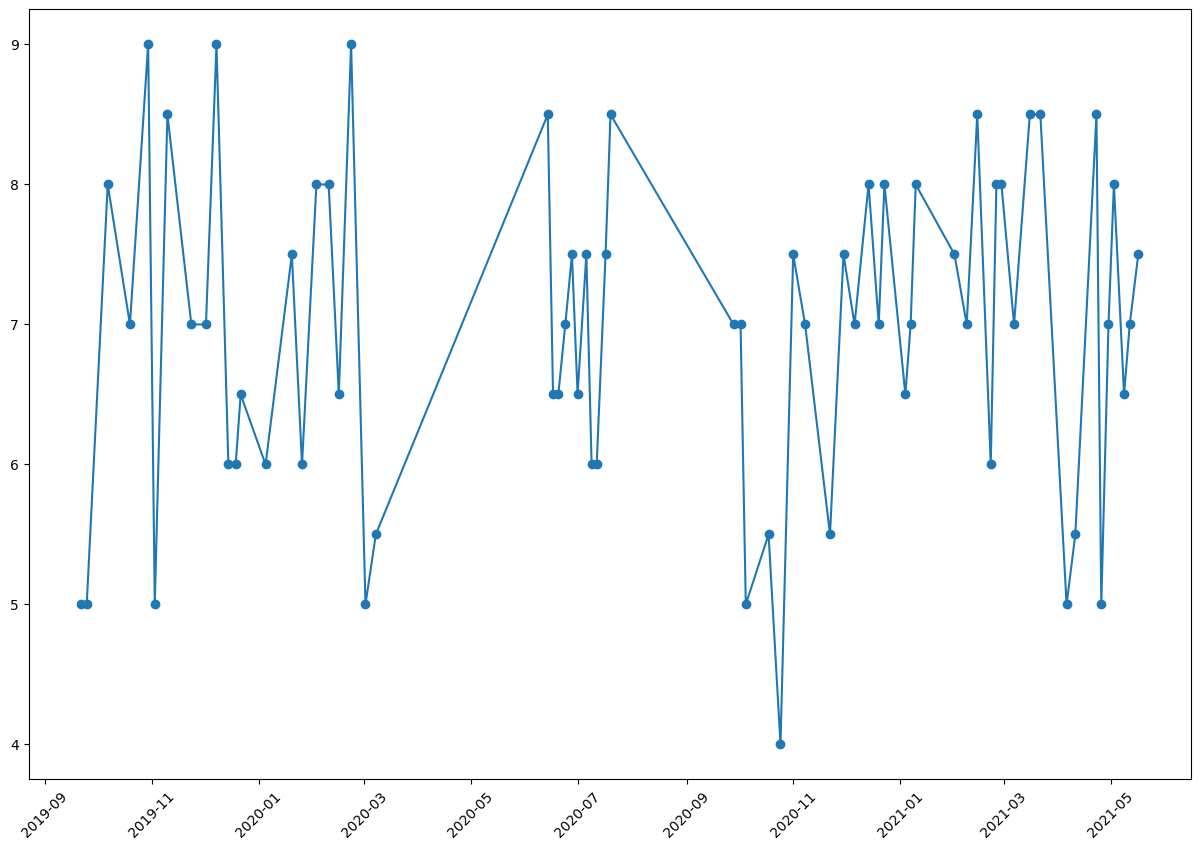

In [25]:
## Calculer les performances de ce joueur sur trois matchs consécutifs et afficher l'évolution en fonction du temps. (visualisation)

df_matchs_filtered = df_match_players[df_match_players['playerid'] == messi_id]

df_matchs_filtered = df_matchs_filtered.merge(df_matchs, left_on='matchid', right_on='idmatch', how='left')
df_matchs_filtered = df_matchs_filtered[['date', 'playerid', 'final_mark_2015']]
df_matchs_filtered = df_matchs_filtered.sort_values(by='date')

plt.figure(figsize=(15, 10))
plt.plot(df_matchs_filtered['date'], df_matchs_filtered['final_mark_2015'], marker='o')
plt.xticks(rotation=45)

In [26]:
## Combien de cartons (rouge et jaune) a eu ce joueur ?

(df_higlihts[(df_higlihts['event'] == 'booking') & (df_higlihts['idplayer'] == messi_id)]).shape[0]

8

In [27]:
## Est-ce que ce joueur fait partie des meilleurs butteurs dans son championnat ?
## Pour cela, afficher les 10 meilleurs buteurs de son championnat (idplayer,nom,
## nombre de buts) (requête). (=> championnat = 3)

df_merged = df_higlihts.merge(df_matchs, left_on='idmatch', right_on='idmatch', how='left')
df_merged = df_merged[(df_merged['type'] == 'goal') & (df_merged['championship'] == 3)]

df_merged = df_merged.groupby('idplayer').agg({'type': 'count'}).reset_index().rename(columns={'type': 'goals'})
df_merged = df_merged.merge(df_players, left_on='idplayer', right_on='idplayer', how='left')
df_merged = df_merged.sort_values(by='goals', ascending=False).head(10)

df_merged


,idplayer,goals,lastname
100,19054,47,Messi
122,19927,36,Benzema
199,39336,33,Suárez
363,93721,30,Moreno
150,219168,26,Isak
178,234991,26,En-Nesyri
364,94273,22,Budimir
302,76650,21,Griezmann
288,61316,19,Joselu
202,40270,18,Aspas


In [28]:
# V. Analyse et visualisation graphique - Analyse des statistiques des clubs Liverpool et Arsenal

## Quels sont les team_id des clubs Liverpool et Arsenal

liverpool_id = df_teams[df_teams['name'] == 'Liverpool']['idteam'].values[0]

arsenal_id = df_teams[df_teams['name'] == 'Arsenal']['idteam'].values[0]

liverpool_id, arsenal_id

('14', '3')

In [29]:
## Afficher la liste des joueurs du club Arsenal (id, nom)

df_filtered = df_players_historical[(df_players_historical['team'].str.contains('Arsenal')) & (df_players_historical['end_date'].isnull())]

df_filtered[['player_id', 'name']]

,player_id,name
963,444145,Gabriel Martinelli
964,242166,Guendouzi
965,200641,Nelson
968,195735,Pépé
969,182539,Dani Ceballos
971,101184,Chambers
974,80201,Leno
975,59966,Lacazette
977,54694,Aubameyang
978,41270,David Luiz


In [30]:
## Est-ce qu'il existe un match opposant Liverpool et Arsenal ? Si oui, quel est le
## score de ce(s) match(s) ? Et afficher les joueurs (id, position) du club Liverpool
## d'un de ses matchs.

df_matchs_filtered = df_matchs[(df_matchs['idteam_home'] == liverpool_id) & (df_matchs['idteam_away'] == arsenal_id) | (df_matchs['idteam_home'] == arsenal_id) & (df_matchs['idteam_away'] == liverpool_id)]

df_matchs_filtered = df_matchs_filtered.merge(df_teams, left_on='idteam_home', right_on='idteam', how='left').rename(columns={'name': 'name_home'}).drop(columns='idteam').drop(columns='idteam_home')
df_matchs_filtered = df_matchs_filtered.merge(df_teams, left_on='idteam_away', right_on='idteam', how='left').rename(columns={'name': 'name_away'}).drop(columns='idteam').drop(columns='idteam_away')

df_matchs_filtered = df_matchs_filtered[['idmatch', 'name_home', 'home_score', 'away_score', 'name_away']]

df_matchs_filtered

,idmatch,name_home,home_score,away_score,name_away
0,match_1059725,Liverpool,3,1,Arsenal
1,match_1060052,Arsenal,2,1,Liverpool
2,match_2128310,Liverpool,3,1,Arsenal
3,match_2128576,Arsenal,0,3,Liverpool


In [31]:
df_matchs_filtered_selected = df_matchs_filtered.iloc[0]

match_id = df_matchs_filtered_selected['idmatch']

df_players_match_filtered = df_match_players[(df_match_players['matchid'] == match_id) & (df_match_players['teamid'] == liverpool_id)]

df_players_match_filtered[['playerid', 'position']]

,playerid,position
828,15157,Midfielder
829,39155,Midfielder
830,41733,Midfielder
831,56979,Midfielder
832,60706,Goalkeeper
833,60914,Defender
834,68312,Midfielder
835,81880,Midfielder
836,92217,Striker
837,97032,Defender


(array([18170., 18262., 18353., 18444., 18536., 18628., 18718.]),
 [Text(18170.0, 0, '2019-10'),
  Text(18262.0, 0, '2020-01'),
  Text(18353.0, 0, '2020-04'),
  Text(18444.0, 0, '2020-07'),
  Text(18536.0, 0, '2020-10'),
  Text(18628.0, 0, '2021-01'),
  Text(18718.0, 0, '2021-04')])

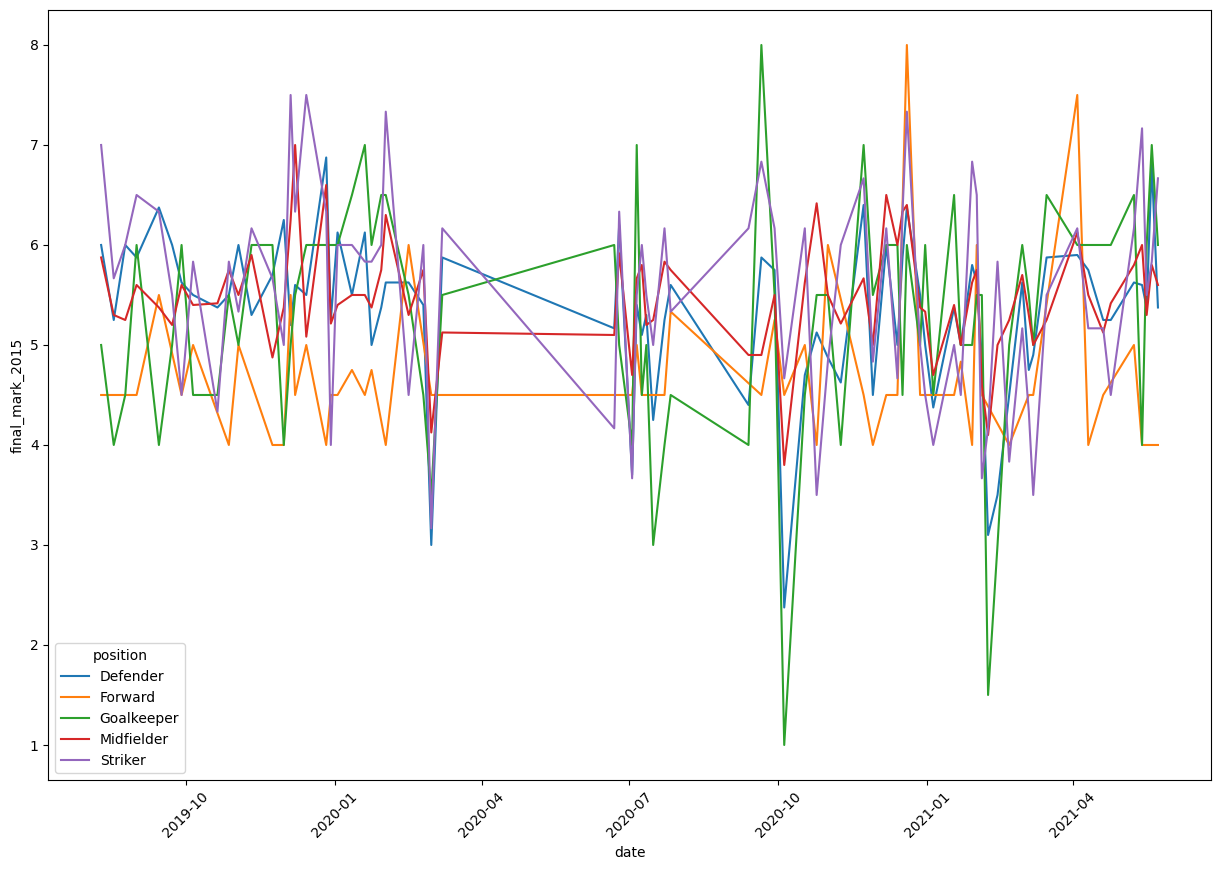

In [32]:
## Afficher l'évolution des notes moyennes des joueurs par
## position (defender, Midfielder...) en fonction du temps (visualisation) du club
## Liverpool. On pourra lier les postes forward et striker.

df_match_players_filtered = df_match_players[df_match_players['teamid'] == liverpool_id]
df_match_players_filtered = df_match_players_filtered.merge(df_matchs, left_on='matchid', right_on='idmatch', how='left')
df_match_players_filtered = df_match_players_filtered[['date', 'position', 'final_mark_2015']]

df_match_players_filtered = df_match_players_filtered.groupby(['date', 'position']).agg({'final_mark_2015': 'mean'}).reset_index()
df_match_players_filtered['position'] = df_match_players_filtered['position'].apply(lambda x: 'forward' if x == 'striker' else x)

plt.figure(figsize=(15, 10))
sns.lineplot(data=df_match_players_filtered, x='date', y='final_mark_2015', hue='position')
plt.xticks(rotation=45)

/tmp/ipykernel_491/3603626565.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matchs_filtered_liverpool['gap'] = df_matchs_filtered_liverpool.apply(lambda x: x['home_score'] - x['away_score'] if x['idteam_home'] == liverpool_id else x['away_score'] - x['home_score'], axis=1)
/tmp/ipykernel_491/3603626565.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matchs_filtered_arsenal['gap'] = df_matchs_filtered_arsenal.apply(lambda x: x['home_score'] - x['away_score'] if x['idteam_home'] == arsenal_i

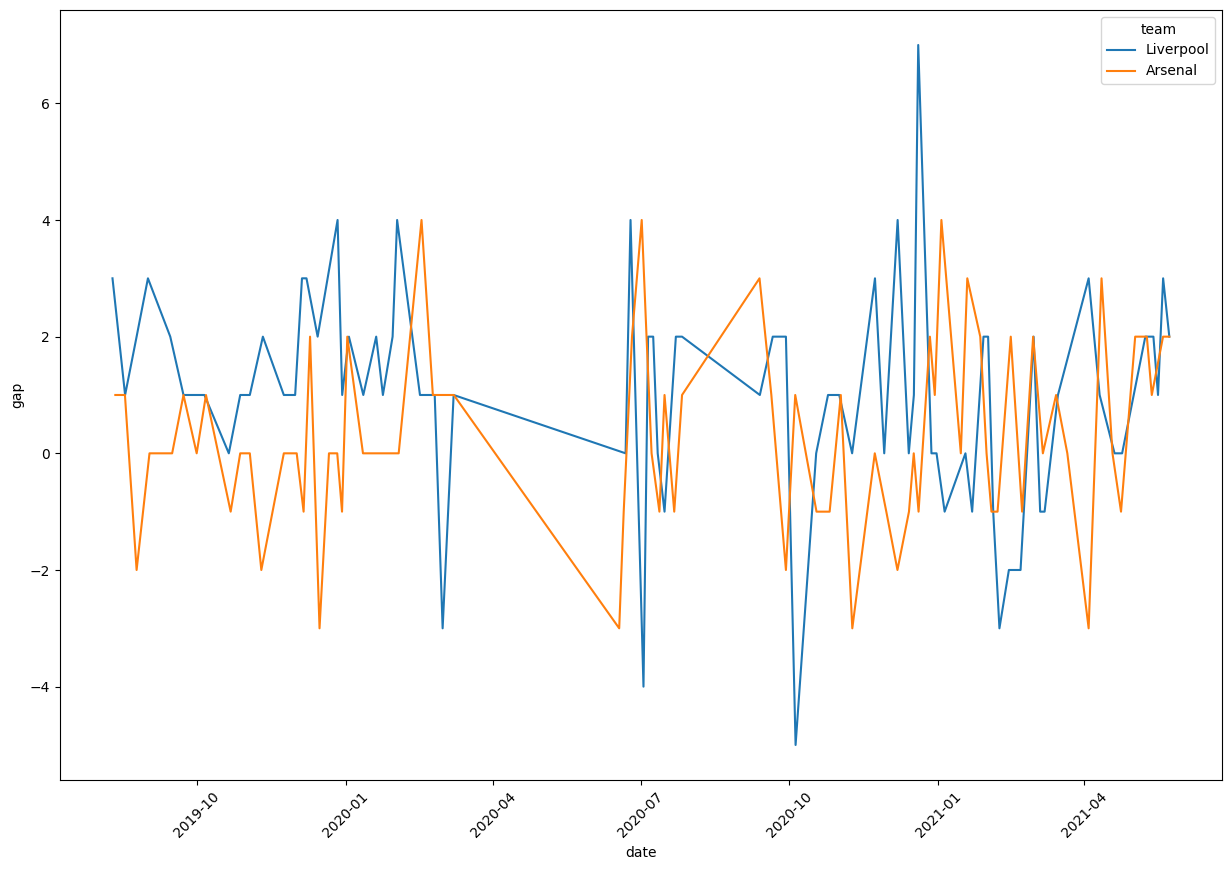

In [33]:
## Réaliser un graphique de l'évolution des écarts de résultats des clubs
## Liverpool et Arsenal (sur tous les matchs) en fonctions du temps (par ex : une
## victoire avec un score 3-2 correspondra à un score de 1; une défaite avec un
## score 1-4 correspondra à une score -3 ; un match nul correspond à un score
## 0).

# Cast the score columns to int
df_matchs['home_score'] = df_matchs['home_score'].astype(int)
df_matchs['away_score'] = df_matchs['away_score'].astype(int)

df_matchs_filtered_liverpool = df_matchs[(df_matchs['idteam_home'] == liverpool_id) | (df_matchs['idteam_away'] == liverpool_id)]
df_matchs_filtered_arsenal = df_matchs[(df_matchs['idteam_home'] == arsenal_id) | (df_matchs['idteam_away'] == arsenal_id)]

df_matchs_filtered_liverpool['gap'] = df_matchs_filtered_liverpool.apply(lambda x: x['home_score'] - x['away_score'] if x['idteam_home'] == liverpool_id else x['away_score'] - x['home_score'], axis=1)
df_matchs_filtered_arsenal['gap'] = df_matchs_filtered_arsenal.apply(lambda x: x['home_score'] - x['away_score'] if x['idteam_home'] == arsenal_id else x['away_score'] - x['home_score'], axis=1)

df_matchs_filtered_liverpool = df_matchs_filtered_liverpool[['date', 'gap']]
df_matchs_filtered_arsenal = df_matchs_filtered_arsenal[['date', 'gap']]

df_matchs_filtered_liverpool['team'] = 'Liverpool'
df_matchs_filtered_arsenal['team'] = 'Arsenal'

df_matchs_filtered = pd.concat([df_matchs_filtered_liverpool, df_matchs_filtered_arsenal])

plt.figure(figsize=(15, 10))
sns.lineplot(data=df_matchs_filtered, x='date', y='gap', hue='team')
plt.xticks(rotation=45)
plt.show()

In [34]:
## Quels est le nombre moyen de changement par match pour le club Arsenal ?

df_arsenal_match_ids = df_matchs[(df_matchs['idteam_home'] == arsenal_id) | (df_matchs['idteam_away'] == arsenal_id)]['idmatch']

df_substitutions_filtered = df_substitutions[df_substitutions['idmatch'].isin(df_arsenal_match_ids)]
df_arsenal_players = df_players_historical[(df_players_historical['team'].str.contains('Arsenal')) & (df_players_historical['end_date'].isnull())]

df_substitutions_filtered = df_substitutions_filtered[df_substitutions_filtered['off_playerId'].isin(df_arsenal_players['player_id'])]
df_substitutions_filtered.groupby('idmatch').size().mean()

2.8815789473684212

/tmp/ipykernel_491/72916965.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matchs_filtered['result_home'] = df_matchs_filtered.apply(lambda x: 'win' if x['home_score'] > x['away_score'] else 'draw' if x['home_score'] == x['away_score'] else 'loss', axis=1)


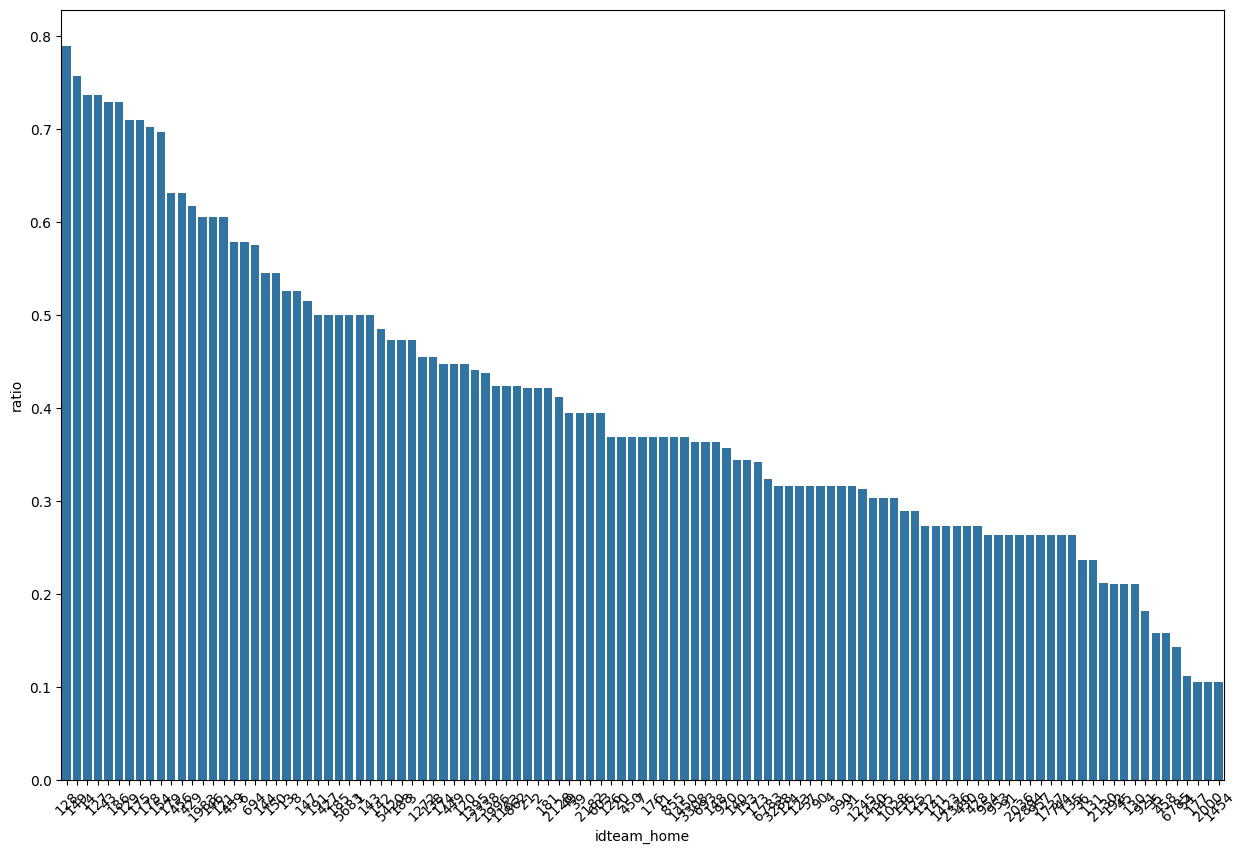

In [35]:
# V. Analyse et visualisation graphique - Corrélation entre match à domicile et victoire

## Existe-t-il une corrélation entre match à domicile et victoire ? Afficher le nombre de
## victoire/défaite en fonction des équipes à domicile (home) et invité (away). Est-ce
## qu'on observe une corrélation ?

df_matchs_filtered = df_matchs[['idteam_home', 'idteam_away', 'home_score', 'away_score']]
df_matchs_filtered['result_home'] = df_matchs_filtered.apply(lambda x: 'win' if x['home_score'] > x['away_score'] else 'draw' if x['home_score'] == x['away_score'] else 'loss', axis=1)

df_matchs_filtered = df_matchs_filtered.groupby('idteam_home').agg({'result_home': 'value_counts'}).unstack().fillna(0)

df_matchs_filtered['ratio'] = df_matchs_filtered['result_home']['win'] / (df_matchs_filtered['result_home']['win'] + df_matchs_filtered['result_home']['loss'] + df_matchs_filtered['result_home']['draw'])

df_matchs_filtered = df_matchs_filtered.sort_values(by='ratio', ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(data=df_matchs_filtered, x=df_matchs_filtered.index, y='ratio')
plt.xticks(rotation=45)
plt.show()

In [36]:
# V. Analyse et visualisation graphique - Paris sportif

## Quel club nous aurait-il rapporté le plus si nous avions parié 1€ sur sa victoire à
## chaque match ? A partir des « quotations » de pré-match et des résultats finaux,
## nous souhaitons répondre à cette question. Pour y répondre, il commencer par faut
## calculer le gain pour chaque résultat de match.

df_matchs_filtered = df_matchs[['idteam_home', 'idteam_away', 'home_score', 'away_score', 'quotation_home', 'quotation_away', 'quotation_draw']]

df_quotation_home = df_matchs_filtered.groupby('idteam_home').agg({'quotation_home': 'mean'}).reset_index().rename(columns={'idteam_home': 'idteam'})
df_quotation_away = df_matchs_filtered.groupby('idteam_away').agg({'quotation_away': 'mean'}).reset_index().rename(columns={'idteam_away': 'idteam'})

df_quotation = df_quotation_home.merge(df_quotation_away, left_on='idteam', right_on='idteam', how='outer')
df_quotation['mean_quotation'] = df_quotation[['quotation_home', 'quotation_away']].mean(axis=1)
df_quotation.drop(columns=['quotation_home', 'quotation_away'])

df_max_quotation = df_quotation[df_quotation['mean_quotation'] == df_quotation['mean_quotation'].max()]
df_teams[df_teams['idteam'].isin(df_max_quotation['idteam'])]

,idteam,name
1,45,Norwich


/tmp/ipykernel_491/513706136.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matchs_filtered['result_home'] = df_matchs_filtered.apply(lambda x: 'win' if x['home_score'] > x['away_score'] else 'draw' if x['home_score'] == x['away_score'] else 'loss', axis=1)
/tmp/ipykernel_491/513706136.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matchs_filtered['result_away'] = df_matchs_filtered.apply(lambda x: 'win' if x['home_score'] < x['away_score'] else 'draw' if x['home_score'] == x['away_score']

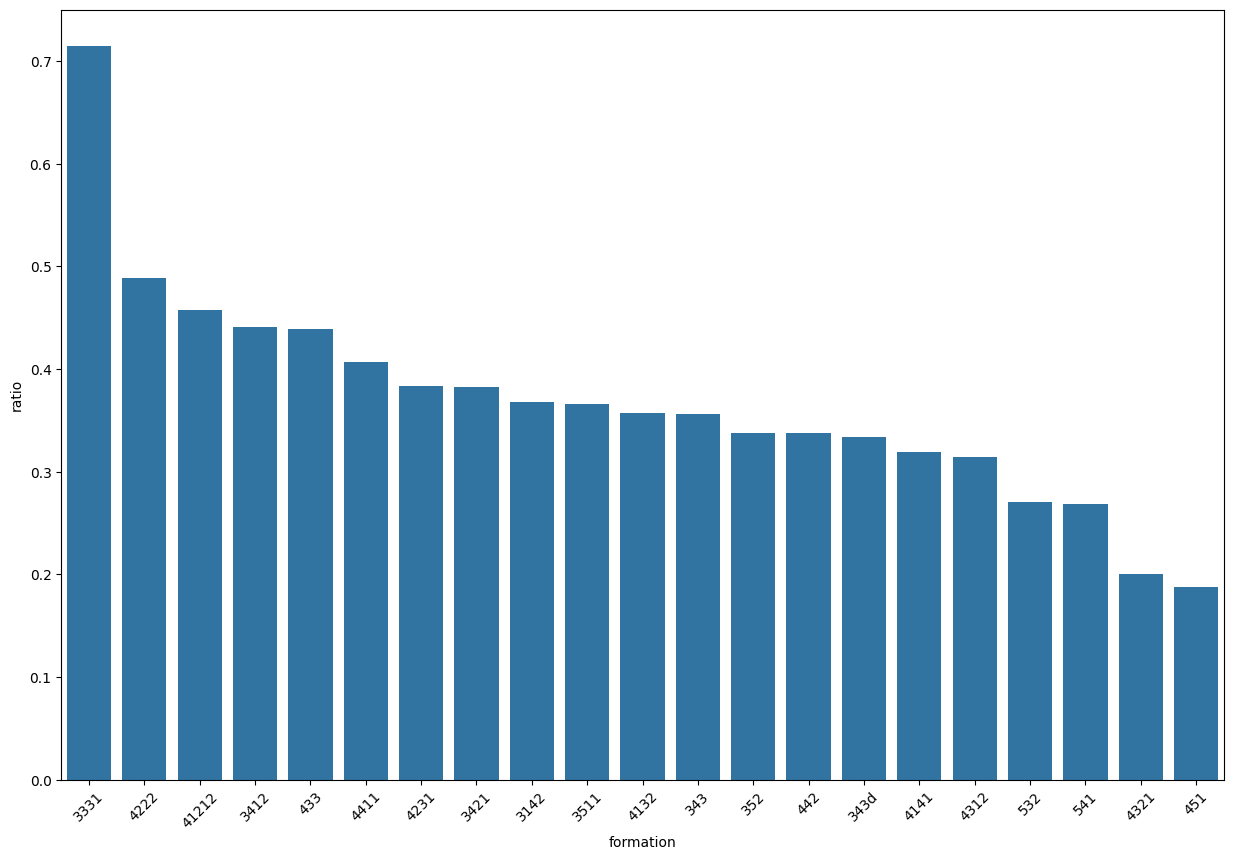

In [37]:
# V. Analyse et visualisation graphique - Corrélation entre formation et victoire

## Nous allons maintenant analyser la formation et la victoire. L'objectif est de savoir s'il
## existe une corrélation entre un certain type de formation et la victoire. Réalisez un
## histogramme avec le taux de victoire en fonction de la formation mise en place en
## match. Analysez le résultat obtenu.


df_matchs_filtered = df_matchs[['idmatch', 'idteam_home', 'idteam_away', 'home_score', 'away_score', 'home_formation', 'away_formation']]


df_matchs_filtered['result_home'] = df_matchs_filtered.apply(lambda x: 'win' if x['home_score'] > x['away_score'] else 'draw' if x['home_score'] == x['away_score'] else 'loss', axis=1)
df_matchs_filtered['result_away'] = df_matchs_filtered.apply(lambda x: 'win' if x['home_score'] < x['away_score'] else 'draw' if x['home_score'] == x['away_score'] else 'loss', axis=1)

df_matchs_home = df_matchs_filtered[['home_formation', 'result_home']].rename(columns={'home_formation': 'formation', 'result_home': 'result'})
df_matchs_away = df_matchs_filtered[['away_formation', 'result_away']].rename(columns={'away_formation': 'formation', 'result_away': 'result'})
df_matchs_merged = pd.concat([df_matchs_home, df_matchs_away])

df_matchs_merged = df_matchs_merged.groupby('formation').agg({'result': 'value_counts'}).unstack().fillna(0)
df_matchs_merged['ratio'] = df_matchs_merged['result']['win'] / (df_matchs_merged['result']['win'] + df_matchs_merged['result']['loss'] + df_matchs_merged['result']['draw'])
df_matchs_merged = df_matchs_merged.sort_values(by='ratio', ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(data=df_matchs_merged, x=df_matchs_merged.index, y='ratio')
plt.xticks(rotation=45)
plt.show()